## Importing the Packages

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Here we will use a dataset from the Scikitlearn website. 

#### The link for the website from where this data is taken: 
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

#### Importing the data as a dataframe. 

In [7]:
df = fetch_california_housing(as_frame = True) # Here we use as_frame = True, becuase we want it to be imported as a dataframe.

feature_name = df["feature_names"]
target = df["target_names"]
data = df["data"]
data[target] = df["target"]
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### Now, let's import the machine learning models

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import explained_variance_score, mean_squared_error

train, test = train_test_split(data, random_state = 42)

## Linear Regression Model

In [21]:
lrm = LinearRegression().fit(train[feature_name], train[target])
pred_lrm = lrm.predict(test[feature_name])

print("Explained Variance score (Linear Regression): ", round(explained_variance_score(test[target],pred_lrm),3))
print("Linear regressor mean squared error (Linear Regression): ", round(mean_squared_error(test[target],pred_lrm),3))

Explained Variance score (Linear Regression):  0.591
Linear regressor mean squared error (Linear Regression):  0.541


### Plotting a crossplot to show how our model behaved

<AxesSubplot:title={'center':'True value vs Predictions'}, xlabel='pred_lrm', ylabel='MedHouseVal'>

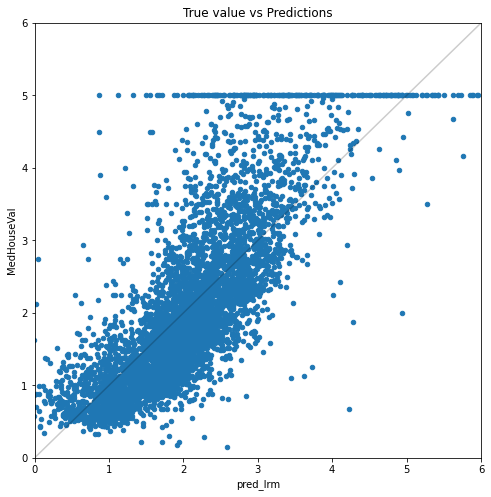

In [32]:
import warnings                    # I do not condone this "ignore" warning code.
warnings.filterwarnings("ignore")  # In this case, the warning was not severe, hence I have included this. It's best to not include.
                                   # For the sake of ddemonstration and clarity, this is added here.
test["pred_lrm"] = pred_lrm
fig, ax  = plt.subplots()
ax.plot([0,6], [0, 6], "k-", alpha = 0.2)
test.plot(
x = "pred_lrm",
y = "MedHouseVal",
kind ="scatter", 
figsize = (8,8),
title = "True value vs Predictions", 
xlim = (0,6),
ylim =  (0,6), 
ax = ax)

## Gradient Boosting Model

In [24]:
gbm = GradientBoostingRegressor(random_state = 0).fit(train[feature_name], train[target])
pred_gbm = gbm.predict(test[feature_name])
print("Explained Variance score (Gradient Boosting) : ", round(explained_variance_score(test[target],pred_gbm),3))
print("Mean squared error (Gradient Boosting): ", round(mean_squared_error(test[target],pred_gbm),3))

Explained Variance score (Gradient Boosting) :  0.781
Mean squared error (Gradient Boosting):  0.29


<AxesSubplot:title={'center':'True value vs Predictions'}, xlabel='pred_gbm', ylabel='MedHouseVal'>

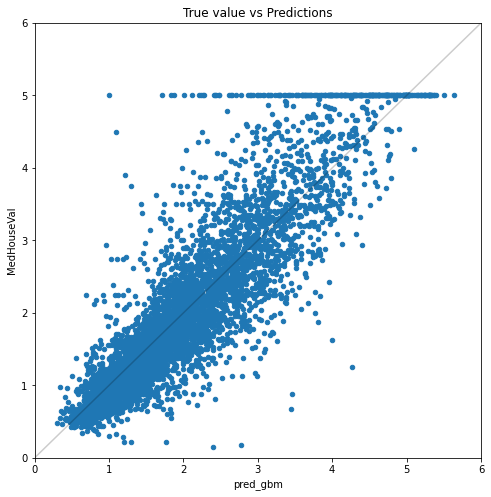

In [33]:
import warnings                    # Again, I do not condone this "ignore" warning code.
warnings.filterwarnings("ignore")

test["pred_gbm"] = pred_gbm
fig, ax  = plt.subplots()
ax.plot([0,6], [0, 6], "k-", alpha = 0.2)
test.plot(
x = "pred_gbm",
y = "MedHouseVal",
kind ="scatter", 
figsize = (8,8),
title = "True value vs Predictions", 
xlim = (0,6),
ylim =  (0,6), 
ax = ax)

## Neural Network Model

In [34]:
nnm = MLPRegressor(
hidden_layer_sizes = (12,16),
activation = 'logistic', #You can also try ReLu
random_state = 42
).fit(train[feature_name], train[target])

pred_nnm = nnm.predict(test[feature_name])
print("Explained Variance score (Nueral Network): ", round(explained_variance_score(test[target],pred_nnm),3))
print("Mean squared error (Nueral Network): ", round(mean_squared_error(test[target],pred_nnm),3))

Explained Variance score (Nueral Network):  0.631
Mean squared error (Nueral Network):  0.519


<AxesSubplot:title={'center':'True value vs Predictions'}, xlabel='pred_nnm', ylabel='MedHouseVal'>

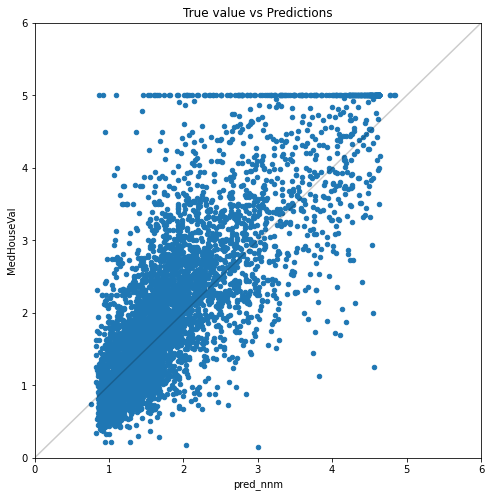

In [35]:
import warnings                    # Again, I do not condone this "ignore" warning code. This is just for demonstration.
warnings.filterwarnings("ignore")

test["pred_nnm"] = pred_nnm
fig, ax  = plt.subplots()
ax.plot([0,6], [0, 6], "k-", alpha = 0.2)
test.plot(
x = "pred_nnm",
y = "MedHouseVal",
kind ="scatter", 
figsize = (8,8),
title = "True value vs Predictions", 
xlim = (0,6),
ylim =  (0,6), 
ax = ax)

# Building the Hybrid Model

### Building the Meta-Regressor

Explained Variance score (Stack Regressor):  0.789
Mean squared error (Stack Regressor):  0.281


<AxesSubplot:title={'center':'Correlations between true value and predictions'}, xlabel='pred_stack', ylabel='MedHouseVal'>

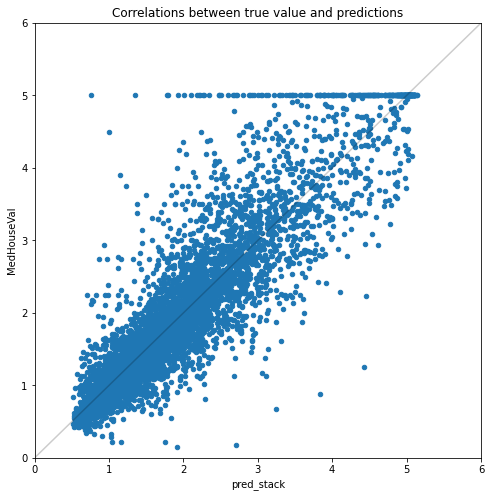

In [37]:
# Support vector regressor with rbr () - Non linear model. 

import warnings                    # Again, I do not condone this "ignore" warning code. This is just for demonstration.
warnings.filterwarnings("ignore")

from mlxtend.regressor import StackingRegressor
from sklearn.svm import SVR

reg_models = [lrm, gbm, nnm]
meta_reg = SVR(kernel = 'rbf')

stackreg = StackingRegressor(
regressors = reg_models,
meta_regressor = meta_reg).fit(train[feature_name], train[target])

pred_stack = stackreg.predict(test[feature_name])

print("Explained Variance score (Stack Regressor): ", round(explained_variance_score(test[target],pred_stack),3))
print("Mean squared error (Stack Regressor): ", round(mean_squared_error(test[target],pred_stack),3))

test["pred_stack"] = pred_stack
fig, ax  = plt.subplots()
ax.plot([0,6], [0, 6], "k-", alpha = 0.2)
test.plot(
x = "pred_stack",
y = "MedHouseVal",
kind ="scatter", 
figsize = (8,8),
title = "Correlations between true value and predictions", 
xlim = (0,6),
ylim =  (0,6), 
ax = ax)

## Final Results

The explained variance score for linear Regression Model was:  0.591
The explained variance score for Gradient Boosting Model was:  0.781
The explained variance score for Neural Net Model was:  0.631
The explained variance score for Hybrid Stack regressor Model was:  0.789


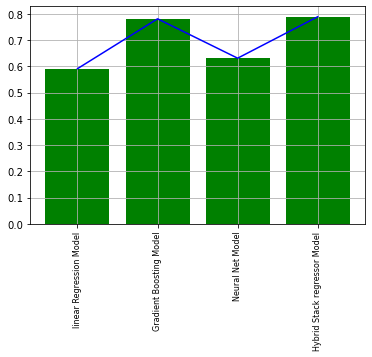

In [52]:
print("The explained variance score for linear Regression Model was: ", round(explained_variance_score(test[target],pred_lrm),3))
print("The explained variance score for Gradient Boosting Model was: ", round(explained_variance_score(test[target],pred_gbm),3))
print("The explained variance score for Neural Net Model was: ", round(explained_variance_score(test[target],pred_nnm),3))
print("The explained variance score for Hybrid Stack regressor Model was: ", round(explained_variance_score(test[target],pred_stack),3))

d = {'Model': ["linear Regression Model", "Gradient Boosting Model", "Neural Net Model", "Hybrid Stack regressor Model"], 'EVS': [round(explained_variance_score(test[target],pred_lrm),3), round(explained_variance_score(test[target],pred_gbm),3), round(explained_variance_score(test[target],pred_nnm),3), round(explained_variance_score(test[target],pred_stack),3)]}
df = pd.DataFrame(data=d)
xaxis = [model for model in df.Model]
yaxis = [score for score in df.EVS]
plt.bar(xaxis, yaxis, color = 'g')
plt.plot(xaxis, yaxis, color = 'b')
plt.xticks(rotation = 'vertical', size = 8)
plt.grid()

### It is clearly Evident that the Hybrid ML model is better than any of the individual models, even if by a slight margin. 